<a href="https://colab.research.google.com/github/felipemontano10/DeepLearning/blob/master/PS2_JFelipeMontanoCampos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ECE 685D - Fall 2020
## Problem Set 2 

> J. Felipe Montano-Campos

**Problem 1: Conditional Multivariate Gaussian Distribution**


In [ ]:
import numpy as np
from numpy.linalg import inv

In [ ]:
mu = np.array([1,1,1,2])
mu_1 = np.array([1,1])
mu_2 = np.array([1,2])
x_1 = np.array([1,1])
ps_11 = np.array([[1,0],[0,1]])
ps_12 = np.array([[0.25,0],[0,0.25]])
ps_21 = np.array([[0.25,0],[0,0.25]])
ps_22 = np.array([[1.25,0],[0,1.25]])


In [ ]:
mu_x2_x1 = mu_2 + np.matmul(np.matmul(ps_21, inv(ps_11)), (x_1-mu_1))
va_x2_x1 = ps_22 - np.matmul(np.matmul(ps_21, inv(ps_11)), ps_12)

In [ ]:
print(mu_x2_x1)
print(va_x2_x1)

[1. 2.]
[[1.1875 0.    ]
 [0.     1.1875]]


**Problem 2: Gaussian Mixture Model**

In [ ]:
import numpy as np
from random import choices
import matplotlib.pyplot as plt



In [ ]:
K = 4

gaussian_dist = np.array([1,2,3,4])
mix_coeff = np.array([1/8, 1/8, 1/4, 1/2])

mu = {}
mu["mu_1"] = np.array([0,0])
mu["mu_2"] = np.array([0,2])
mu["mu_3"] = np.array([2,0])
mu["mu_4"] = np.array([2,2])

sigma = {}
sigma["sigma_1"] = np.array([[0.2 , 0.1], [0.1,0.2]])
sigma["sigma_2"] = np.array([[0.1 , -0.15], [-0.15 ,0.3]])
sigma["sigma_3"] = np.array([[0.3 , 0.05], [0.05 ,0.3]])
sigma["sigma_4"] = np.array([[0.15 , 0], [0 ,0.15]])

**Create the Data Set from a GMM**

In [ ]:
data_set = np.array([0,0])
data_set = np.expand_dims(data_set, axis=0)
for i in list(range(10**3)):
    choice = choices(gaussian_dist, mix_coeff)[0]
    array = np.random.multivariate_normal(mu["mu_"+str(choice)], sigma["sigma_"+str(choice)])    
    array = np.expand_dims(array, axis=0)
    data_set = np.append(data_set, array, axis = 0)
    
data_set = np.delete(data_set,0, axis=0)

**Fit a GMM to the data generated**

In [ ]:
from sklearn import mixture

K = [1,2,3,4,5,6,7]

likelihood = []
for k in K:
    gmm = mixture.GaussianMixture(n_components=k, max_iter=1000, covariance_type='full').fit(data_set)
    score = gmm.score(data_set)
    likelihood.append(score)

**Plot of the Log-Likelihood Function**

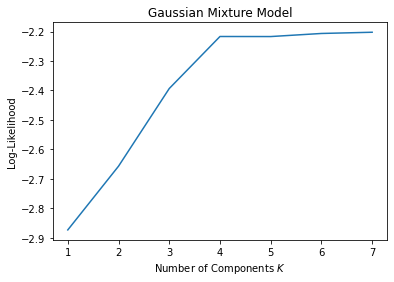

In [ ]:
plt.plot(K, likelihood)
plt.title('Gaussian Mixture Model')
plt.xlabel('Number of Components $K$')
plt.ylabel('Log-Likelihood')
plt.show()

**Problem 3: Bayesian linear regression**

**a) and b) Please look at the pdf file** 

**c) Plot the contour of prior and posterior distributions**

In [ ]:
import numpy as np
from numpy.linalg import inv

def sum_norm(N,mu,var):
    data = np.array([0,0])
    data = np.expand_dims(data, axis=0)
    for i in list(range(N)):
        array = np.random.multivariate_normal(mu, var)
        array = np.expand_dims(array,axis=0)
        data = np.append(data,array,axis=0)
        value = data.sum(axis=0)
    return value  

**Set up the values of the parameters**

In [ ]:
N = 10
mu_0 = np.array([0.5, 0.5])
sigma_0 = np.array([[0.1,0],[0,0.1]])
x = np.array([1,5,1.5])
sigma_y = np.array([[0.2,0.1],[0.1,0.1]])
sigma_inv = inv(sigma_0)+N*inv(sigma_y)
mu = np.dot(np.dot(inv(sigma_inv),inv(sigma_0)),mu_0)+ np.dot(np.dot(inv(sigma_inv),inv(sigma_y)),sum_norm(N,mu_0,sigma_0).T)
sigma = inv(sigma_inv)

**Contour of the prior**

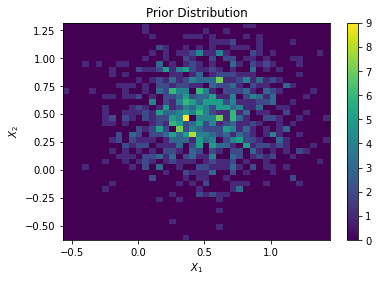

In [ ]:
import matplotlib.pyplot as plt 
prior = np.random.multivariate_normal(mu_0,sigma_0,10**3)
plt.hist2d(prior[:,0],prior[:,1], bins=40)
plt.xlabel(r"$X_{1}$")
plt.ylabel(r"$X_{2}$")
plt.title("Prior Distribution") 
plt.colorbar()
plt.show()  

**Contour of the posterior**

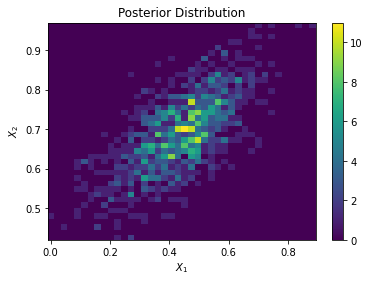

In [ ]:
posterior = np.random.multivariate_normal(mu,sigma,10**3)
plt.hist2d(posterior[:,0],posterior[:,1], bins=40)
plt.xlabel(r"$X_{1}$")
plt.ylabel(r"$X_{2}$")
plt.title("Posterior Distribution") 
plt.colorbar()
plt.show()  

**d) Plot the contour of the prior and posterior distribution**

**Set up the value of the parameters**

In [ ]:
N = 10
mu_0 = np.array([0.5, 0.5])
sigma_0 = np.array([[10,0],[0,10]])
x = np.array([1,5,1.5])
sigma_y = np.array([[0.2,0.1],[0.1,0.1]])
sigma_inv = inv(sigma_0)+N*inv(sigma_y)
mu = np.dot(np.dot(inv(sigma_inv),inv(sigma_0)),mu_0)+ np.dot(np.dot(inv(sigma_inv),inv(sigma_y)),sum_norm(N,mu_0,sigma_0).T)
sigma = inv(sigma_inv)


**Contour of the Prior**

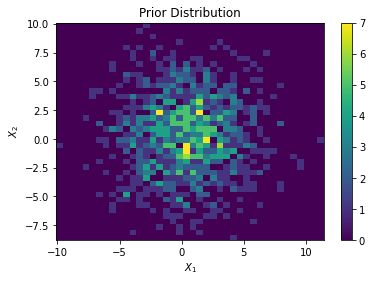

In [ ]:
prior = np.random.multivariate_normal(mu_0,sigma_0,10**3)
plt.hist2d(prior[:,0],prior[:,1], bins=40)
plt.xlabel(r"$X_{1}$")
plt.ylabel(r"$X_{2}$")
plt.title("Prior Distribution") 
plt.colorbar()
plt.show() 


**Countour of the Posterior**

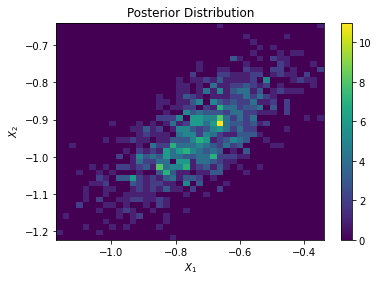

In [ ]:
posterior = np.random.multivariate_normal(mu,sigma,10**3)
plt.hist2d(posterior[:,0],posterior[:,1], bins=40)
plt.xlabel(r"$X_{1}$")
plt.ylabel(r"$X_{2}$")
plt.title("Posterior Distribution") 
plt.colorbar()
plt.show() 

**Set up the value of the parameters**

In [ ]:
N = 100
mu_0 = np.array([0.5, 0.5])
sigma_0 = np.array([[0.1,0],[0,0.1]])
x = np.array([1,5,1.5])
sigma_y = np.array([[0.2,0.1],[0.1,0.1]])

sigma_inv = inv(sigma_0)+N*inv(sigma_y)
mu = np.dot(np.dot(inv(sigma_inv),inv(sigma_0)),mu_0)+ np.dot(np.dot(inv(sigma_inv),inv(sigma_y)),sum_norm(N,mu_0,sigma_0).T)
sigma = inv(sigma_inv)

**Contour of the Prior**

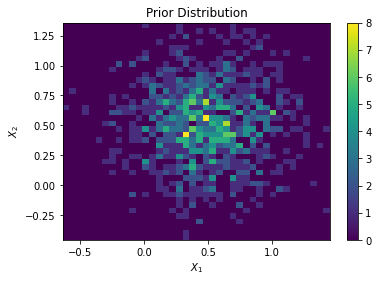

In [ ]:
prior = np.random.multivariate_normal(mu_0,sigma_0,10**3)
plt.hist2d(prior[:,0],prior[:,1], bins=40)
plt.xlabel(r"$X_{1}$")
plt.ylabel(r"$X_{2}$")
plt.title("Prior Distribution") 
plt.colorbar()
plt.show() 

**Countour of the Posterior**

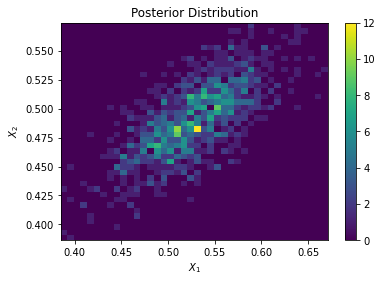

In [ ]:
posterior = np.random.multivariate_normal(mu,sigma,10**3)
plt.hist2d(posterior[:,0],posterior[:,1], bins=40)
plt.xlabel(r"$X_{1}$")
plt.ylabel(r"$X_{2}$")
plt.title("Posterior Distribution") 
plt.colorbar()
plt.show() 

**e) Conclusion from part d**

We can obseve that if we increase the the variance of the prior, the variance of the posterior also increase and the precision of our estimates are less accurate. On the other hand, keeping the variance of the prior equal, as $N$ increases we can observe that the precision of our estimates is better (i.e., the variance of the posterior decreases). This result is intuitive since the more sensors we have, the better we can estimate the location of the object.  

**Problem 4: Bias-variance trade- off**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


**Create the training and test set**

In [ ]:
training = np.linspace(0, 0.8, 5)
labels  =  np.sin(2*np.pi*training) + np.cos(4*np.pi*training)
test = np.linspace(0,0.99,100)
labels_test  =  np.sin(2*np.pi*test) + np.cos(4*np.pi*test)
M = np.linspace(0,15,16)

**Calculate the SSE for the $M$ polynomials models**

In [ ]:
sqrt_errors_train = []
sqrt_errors_test = []

for i in M:
    error_train = np.sum((np.polyval(np.polyfit(training, labels, i), training) - labels)**2)
    error_test = np.sum((np.polyval(np.polyfit(training, labels, i), test) - labels_test)**2)
    sqrt_errors_train.append(error_train)
    sqrt_errors_test.append(error_test)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly co

**Plot for the training and test set**

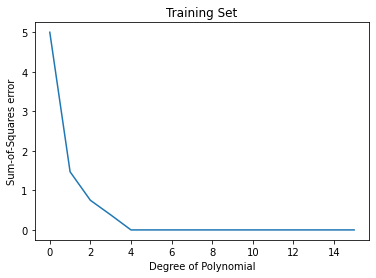

In [ ]:
plt.plot(M, sqrt_errors_train)
plt.title('Training Set')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Sum-of-Squares error')
plt.show()

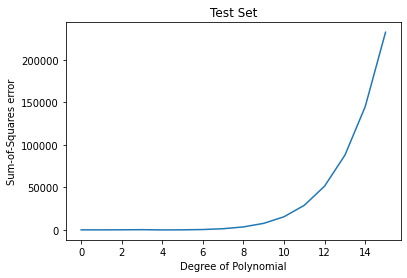

In [ ]:
plt.plot(M, sqrt_errors_test)
plt.title('Test Set')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Sum-of-Squares error')
plt.show()

**$L_{2}$ Regularization Penalty**

In [ ]:
lambda_values = np.linspace(10**-2, 50, 5000)
lambda_values_ln = np.log(lambda_values)

training_matrix = []
for i in list(range(1,15)):
    training_matrix.append(np.power(training,i))
training_matrix = np.array(training_matrix)
training_matrix = training_matrix.transpose()

test_matrix = []
for i in list(range(1,15)):
    test_matrix.append(np.power(test,i))
test_matrix = np.array(test_matrix)
test_matrix = test_matrix.transpose()


In [ ]:
from sklearn.linear_model import Ridge

sqrt_errors_train_lasso = []
sqrt_errors_test_lasso = []


for lamb in lambda_values:
    clf = Ridge(alpha= lamb)
    clf.fit(training_matrix, labels)
    train_predict = clf.predict(training_matrix)
    test_predict = clf.predict(test_matrix)
    error_train = np.sum((train_predict - labels)**2)
    error_test = np.sum((test_predict - labels_test)**2)
    sqrt_errors_train_lasso.append(error_train)
    sqrt_errors_test_lasso.append(error_test)  

**Plot for the training and test set**

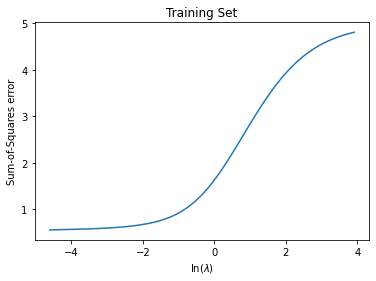

In [ ]:
plt.plot(lambda_values_ln,sqrt_errors_train_lasso )
plt.title('Training Set')
plt.xlabel(r'ln$(\lambda)$')
plt.ylabel('Sum-of-Squares error')
plt.show()

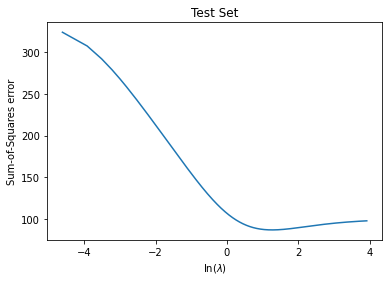

In [ ]:
plt.plot(lambda_values_ln, sqrt_errors_test_lasso)
plt.title('Test Set')
plt.xlabel(r'ln$(\lambda)$')
plt.ylabel('Sum-of-Squares error')
plt.show()



**Problem 5: Minimizing Minkowski Loss**

Please see the pdf.

**Problem 6: Nonlinear Basis Functions**

**Create the data sets**

In [ ]:
import numpy as np
from random import choices

#GMM1
gmm_1 = {}
gmm_1["mu"] = np.array([0,0])
gmm_1["cov"] = np.array([[0.1 , 0], [0 ,0.1]])

gmm1 = np.random.multivariate_normal(gmm_1["mu"], gmm_1["cov"], 100)    


#GMM2
gaussian_dist = np.array([1,2])
mix_coeff = np.array([1/2, 1/2])

gmm_2 = {}
gmm_2["mu_1"] = np.array([-1,-1])
gmm_2["mu_2"] = np.array([1,1])
gmm_2["cov_1"] = np.array([[0.1 , 0], [0 ,0.1]])
gmm_2["cov_2"] = np.array([[0.1 , 0], [0 ,0.1]])

gmm2 = np.array([0,0])
gmm2 = np.expand_dims(gmm2, axis=0)
for i in list(range(200)):
    choice = choices(gaussian_dist, mix_coeff)[0]
    array = np.random.multivariate_normal(gmm_2["mu_"+str(choice)], gmm_2["cov_"+str(choice)])    
    array = np.expand_dims(array, axis=0)
    gmm2 = np.append(gmm2, array, axis = 0)

gmm2 = np.delete(gmm2,0, axis=0)

**Plot the two data sets**

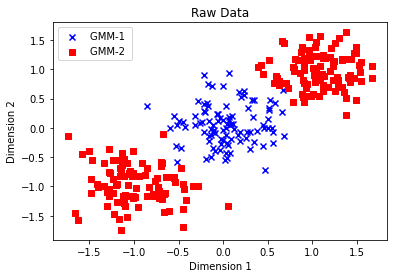

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(gmm1[:,0],gmm1[:,1], c='b', marker='x', label='GMM-1 ')
plt.scatter(gmm2[:,0],gmm2[:,1], c='r', marker='s', label='GMM-2 ')
plt.title("Raw Data")
plt.legend(loc='upper left')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

As we can see we can not find a single line that separates the two data sets.

**Transform the value of our features using the Gaussian basis functions**

In [ ]:
def gaussian_basis(x,mu):
    output = []
    iterations = x.shape[0]
    for i in list(range(iterations)):
        phi = np.exp(-0.5*np.dot(x[i,:]-mu,x[i,:]-mu))
        output.append(phi)
    return output

gmm1_transformed = np.column_stack((gaussian_basis(gmm1,gmm_1["mu"]),gaussian_basis(gmm1,gmm_2["mu_1"])))        
gmm2_transformed = np.column_stack((gaussian_basis(gmm2,gmm_1["mu"]),gaussian_basis(gmm2,gmm_2["mu_1"]))) 

**Plot the transformed data**

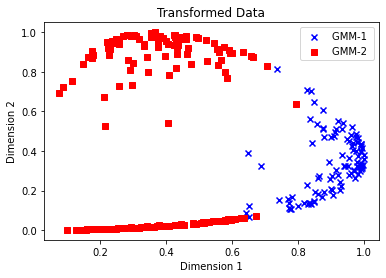

In [ ]:
plt.scatter(gmm1_transformed[:,0],gmm1_transformed[:,1], c='b', marker='x', label='GMM-1 ')
plt.scatter(gmm2_transformed[:,0],gmm2_transformed[:,1], c='r', marker='s', label='GMM-2 ')
plt.title("Transformed Data")
plt.legend(loc='upper right')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

As we can clearly see, the transformed data is "more" separable since the red squares and the blue crosses are more segregated.